In [1]:
#Required libraries
import pandas as pd

In [2]:
#loading and reading the dataset
dataframe = pd.read_csv("uber.csv")

In [3]:
#creating a copy of dataset, we will work on the copy and not temper Actual datset
df = dataframe

In [4]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [6]:
#checking the null values in the dataset
df.isna().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [7]:
#as there is only 1 row is missing in the dataset we can remove it ...
df.dropna(inplace = True)

In [8]:
#checking again the null values after removing 
df.isna().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [9]:
#as the missing values are successfully removed we will move further
df.drop(["Unnamed: 0", "key"], axis =1 , inplace = True)

In [10]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000
mean,11.359892,-72.527631,39.935881,-72.525292,39.923890,1.684543
std,9.901760,11.437815,7.720558,13.117408,6.794829,1.385995
min,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


In [11]:
#converting pickup_datatime column to its proper datatype
df["pickup_datetime"] = pd.to_datetime(df["pickup_datetime"], errors = 'coerce')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 199999 entries, 0 to 199999
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   fare_amount        199999 non-null  float64            
 1   pickup_datetime    199999 non-null  datetime64[ns, UTC]
 2   pickup_longitude   199999 non-null  float64            
 3   pickup_latitude    199999 non-null  float64            
 4   dropoff_longitude  199999 non-null  float64            
 5   dropoff_latitude   199999 non-null  float64            
 6   passenger_count    199999 non-null  int64              
dtypes: datetime64[ns, UTC](1), float64(5), int64(1)
memory usage: 12.2 MB


{'whiskers': [<matplotlib.lines.Line2D at 0x1ece58ed040>,
 'caps': [<matplotlib.lines.Line2D at 0x1ece58ed610>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ece58ecd70>],
 'medians': [<matplotlib.lines.Line2D at 0x1ece58edbe0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ece58edeb0>],
 'means': []}

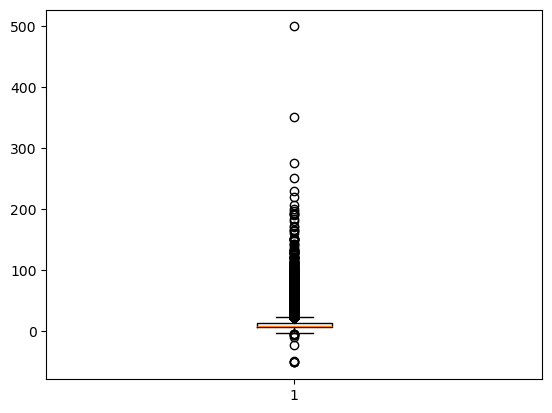

In [13]:
#visualizing the outliers for fare_amount
import matplotlib.pyplot as plt
plt.boxplot(df["fare_amount"])

In [14]:
#function to find the outliers
def find_outliers(df):
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    IQR = q3 - q1
    outliers = df[(df< q1 - 1.5 * IQR) | (df > q3 + 1.5*IQR)]
    return outliers

In [15]:
#let's see outlier insights
fare_amount_outliers = find_outliers(df["fare_amount"])
print("Number of Outlier : " + str(len(fare_amount_outliers)))
print("Max Outlier : " + str(fare_amount_outliers.max()))
print("Min Outlier : " + str(fare_amount_outliers.min()))

Number of Outlier : 17166
Max Outlier : 499.0
Min Outlier : -52.0


In [16]:
#dropping the outliers
q_low = df["fare_amount"].quantile(0.25)
q_hi = df["fare_amount"].quantile(0.75)
iqr = q_hi - q_low
df = df[(df["fare_amount"] < q_hi+1.5*iqr) & (df["fare_amount"] > q_low-1.5*iqr)]

In [17]:
#also dropping rows which have far amount negetive
df.drop(df[df['fare_amount']< 0 ].index, inplace = True)

C:\Users\manis\AppData\Local\Temp\ipykernel_10356\1889955313.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(df[df['fare_amount']< 0 ].index, inplace = True)


<Axes: >

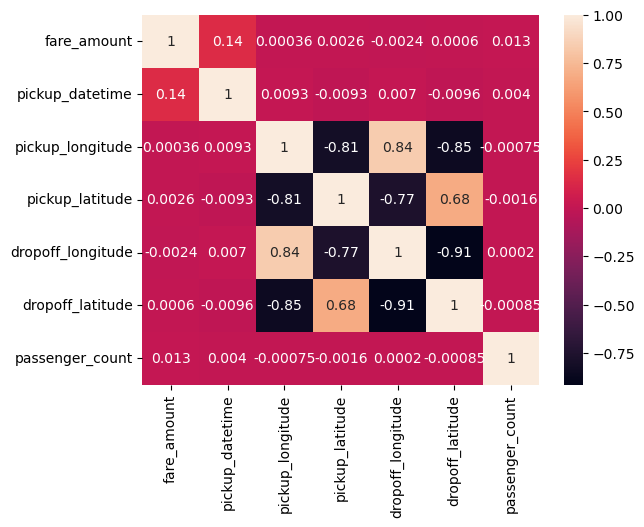

In [18]:
#co-rrelation heatmap 
import seaborn as sns
sns.heatmap(df.corr(), annot = True)

In [19]:
x = df.drop("fare_amount", axis = 1) #independent set
y = df['fare_amount'] #Target Variable

In [20]:
x['pickup_datetime'] = pd.to_numeric(pd.to_datetime(x['pickup_datetime']))

In [21]:
from sklearn.model_selection import  train_test_split

In [22]:
#split the Dataset into testing and training parts
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

In [23]:
#linear regression
from sklearn.linear_model import LinearRegression

In [24]:
lrmodel = LinearRegression()
lrmodel.fit(x_train, y_train) # Fit the Model

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [25]:
predict = lrmodel.predict(x_test)
predict

array([9.04274718, 9.65695699, 8.06734211, ..., 8.91498054, 9.38638658,
       8.88803752])

In [26]:
# Analyze the Metric Scores
from sklearn import metrics
import numpy as np
print(f"Mean absolute error {metrics.mean_absolute_error(y_test, predict)}")
print(f"Mean squared error {metrics.mean_squared_error(y_test, predict)}")
print(f"Root mean squared error {np.sqrt(metrics.mean_squared_error(y_test, predict))}")
# print(metrics.r2_score(y_test,predict))

Mean absolute error 3.251846765229943
Mean squared error 16.92269546056991
Root mean squared error 4.1137203916369804


In [28]:
# Random Forest Regression
from sklearn.ensemble import RandomForestRegressor

In [30]:
# n_estimators = Number of Decision Trees
rfmodel = RandomForestRegressor(n_estimators=100,random_state=101)

In [31]:

rfmodel.fit(x_train,y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [32]:
rfpredict = rfmodel.predict(x_test)
rfpredict

array([ 5.284, 10.515,  5.527, ...,  7.428,  8.405,  4.688])

In [33]:
# Analyze th Metric Scores
from sklearn import metrics
import numpy as np
print(f"Mean absolute error {metrics.mean_absolute_error(y_test, rfpredict)}")
print(f"Mean squared error {metrics.mean_squared_error(y_test, rfpredict)}")
print(f"Root mean squared error {np.sqrt(metrics.mean_squared_error(y_test, rfpredict))}")
# print(metrics.r2_score(y_test,predict))

Mean absolute error 1.4294908111360283
Mean squared error 4.464042857428044
Root mean squared error 2.1128281656178394
